# problem statement

goal it is your job to predict the sales price for each house. for each id in the test set,you must predict the value of th saleprice variable.

Metric submissions are evaluated on mean-sqaured-error (MSE).Submission file format the file should contain a header and have the following format.



  Id,SalePrice

 1461,169000.1
 1462,187724.1233
 1463,175221


You can see an example submission file(sample_submission.cvs)

# Read Dataset

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")


trd = pd.read_csv("downloads/training_set.csv")

In [2]:
trd.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
tsd = pd.read_csv("downloads/testing_set.csv")

In [4]:
tsd.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


# Profile

In [5]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

tsd.info()

filling the missing data with (no alley present ) or none 

# Missing data treatment

In [7]:
trd.Alley = trd.Alley.fillna("None")
trd.BsmtQual = trd.BsmtQual.fillna("None")
trd.BsmtCond = trd.BsmtCond.fillna("None")
trd.BsmtExposure = trd.BsmtExposure.fillna("None")
trd.BsmtFinType1 = trd.BsmtFinType1.fillna("None")
trd.BsmtFinType2 = trd.BsmtFinType2.fillna("None")
trd.FireplaceQu = trd.FireplaceQu.fillna("None")
trd.GarageType = trd.GarageType.fillna("None")
trd.GarageFinish = trd.GarageFinish.fillna("None")
trd.GarageQual = trd.GarageQual.fillna("None")
trd.GarageCond = trd.GarageCond.fillna("None")
trd.PoolQC = trd.PoolQC.fillna("None")
trd.Fence = trd.Fence.fillna("None")
trd.MiscFeature = trd.MiscFeature.fillna("None")

In [8]:
tsd.Alley = tsd.Alley.fillna("None")
tsd.BsmtQual = tsd.BsmtQual.fillna("None")
tsd.BsmtCond = tsd.BsmtCond.fillna("None")
tsd.BsmtExposure = tsd.BsmtExposure.fillna("None")
tsd.BsmtFinType1 = tsd.BsmtFinType1.fillna("None")
tsd.BsmtFinType2 = tsd.BsmtFinType2.fillna("None")
tsd.FireplaceQu = tsd.FireplaceQu.fillna("None")
tsd.GarageType = tsd.GarageType.fillna("None")
tsd.GarageFinish = tsd.GarageFinish.fillna("None")
tsd.GarageQual = tsd.GarageQual.fillna("None")
tsd.GarageCond = tsd.GarageCond.fillna("None")
tsd.PoolQC = tsd.PoolQC.fillna("None")
tsd.Fence = tsd.Fence.fillna("None")
tsd.MiscFeature = tsd.MiscFeature.fillna("None")

In [9]:
trd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
tsd.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

# seperating continues features and categorical features

In [11]:
con = []
cat = []
for i  in trd.columns:
    if(trd[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [12]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
con.remove("SalePrice")

In [14]:
trd[con].nunique().sort_values()

BsmtHalfBath        3
HalfBath            3
Fireplaces          4
KitchenAbvGr        4
FullBath            4
BsmtFullBath        4
GarageCars          5
YrSold              5
BedroomAbvGr        8
PoolArea            8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontage       110
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
Id               1460
dtype: int64

In [15]:
trd[con].nunique().sort_values().index[0:15]

Index(['BsmtHalfBath', 'HalfBath', 'Fireplaces', 'KitchenAbvGr', 'FullBath',
       'BsmtFullBath', 'GarageCars', 'YrSold', 'BedroomAbvGr', 'PoolArea',
       'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'MoSold', 'MSSubClass'],
      dtype='object')

In [16]:
Q=list(trd[con].nunique().sort_values().index[0:15])

if the unique values are less it will be categorical values

all colums prsent in Q is categorical so we have to remove from con list and add in cat list

In [17]:
for i in Q:
    cat.append(i)
    con.remove(i)

In [18]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'BsmtHalfBath',
 'HalfBath',
 'Fireplaces',
 'KitchenAbvGr',
 'FullBath',
 'BsmtFullBath',
 'GarageCars',
 'YrSold',
 'BedroomAbvGr',
 'PoolArea',
 'OverallCond',
 'OverallQual',
 'TotRmsAbvGrd',
 'MoSold',
 'MSSubClass']

In [19]:
con

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

 missing data in traning set should replace with its own mean/mode
but missing data in testing set should replace with the mean/mode of training set

In [20]:
for i in cat:
    x = trd[i].mode()[0]
    trd[i] = trd[i].fillna(x)
    tsd[i] = tsd[i].fillna(x)
    
for i in con:
    x= trd[i].mean()
    trd[i] = trd[i].fillna(x)
    tsd[i] = tsd[i].fillna(x)

In [21]:
trd.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [22]:
tsd.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# Outliers¶

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(trd[con]),columns=con)


In [24]:
out = []
for i in con:
    out = out + list(X1[(X1[i]>3)|(X1[i]<-3)].index)

In [25]:
out

[171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337,
 53,
 249,
 313,
 335,
 384,
 451,
 457,
 661,
 706,
 769,
 848,
 1298,
 1396,
 304,
 630,
 747,
 1132,
 1137,
 1349,
 37,
 58,
 70,
 105,
 115,
 161,
 169,
 178,
 224,
 297,
 349,
 403,
 477,
 517,
 523,
 654,
 691,
 718,
 755,
 763,
 798,
 808,
 825,
 898,
 981,
 1111,
 1169,
 1228,
 1289,
 1298,
 1373,
 1417,
 70,
 178,
 523,
 898,
 1182,
 1298,
 24,
 52,
 113,
 116,
 153,
 166,
 233,
 253,
 260,
 263,
 271,
 273,
 313,
 322,
 355,
 414,
 440,
 446,
 470,
 493,
 542,
 548,
 577,
 586,
 599,
 666,
 697,
 764,
 785,
 828,
 842,
 854,
 888,
 918,
 923,
 924,
 1040,
 1059,
 1077,
 1152,
 1220,
 1253,
 1299,
 1308,
 1320,
 1369,
 1387,
 1418,
 1445,
 1458,
 137,
 224,
 278,
 477,
 496,
 581,
 678,
 774,
 798,
 932,
 1267,
 224,
 332,
 440,
 496,
 523,
 691,
 1044,
 1182,
 1298,
 1373,
 224,
 440,
 496,
 523,
 529,
 691,
 898,
 1024,
 1044,
 1182,
 1298,
 1373,
 304,
 691,
 1169,
 1182,


In [26]:
from numpy import unique
unique(out)

array([   3,    5,    7,   24,   28,   37,   46,   51,   52,   53,   55,
         58,   64,   70,   72,   80,   88,   93,  104,  105,  113,  115,
        116,  118,  120,  125,  129,  137,  153,  154,  159,  161,  166,
        169,  170,  171,  176,  178,  182,  185,  187,  189,  196,  197,
        198,  205,  224,  231,  233,  237,  249,  253,  258,  260,  263,
        267,  271,  273,  277,  278,  280,  289,  293,  297,  304,  306,
        312,  313,  314,  322,  325,  328,  332,  335,  339,  343,  346,
        349,  351,  355,  357,  358,  359,  360,  365,  366,  380,  384,
        400,  403,  406,  414,  426,  440,  446,  451,  457,  459,  462,
        470,  471,  475,  477,  480,  493,  495,  496,  499,  510,  517,
        520,  523,  529,  539,  542,  546,  548,  550,  577,  581,  583,
        586,  589,  591,  599,  605,  608,  618,  625,  630,  635,  645,
        647,  648,  653,  654,  660,  661,  662,  664,  666,  673,  678,
        691,  697,  704,  705,  706,  713,  718,  7

In [27]:

outliers = list(unique(out))

In [28]:
trd = trd.drop(index=outliers,axis=0)

In [29]:
trd.shape

(1167, 81)

In [30]:
trd.index = range(0,1167,1)

# Exploratory data analysis

if the both X and Y varibale are continuous we need to check correlation between them .

In [31]:
trd.corr()["SalePrice"]

Id              -0.022203
MSSubClass      -0.081425
LotFrontage      0.364473
LotArea          0.332757
OverallQual      0.809168
OverallCond     -0.103978
YearBuilt        0.612488
YearRemodAdd     0.560434
MasVnrArea       0.400973
BsmtFinSF1       0.379733
BsmtFinSF2      -0.092927
BsmtUnfSF        0.196123
TotalBsmtSF      0.612887
1stFlrSF         0.568386
2ndFlrSF         0.292292
LowQualFinSF    -0.017583
GrLivArea        0.713686
BsmtFullBath     0.234045
BsmtHalfBath    -0.030940
FullBath         0.585543
HalfBath         0.271022
BedroomAbvGr     0.190053
KitchenAbvGr    -0.145684
TotRmsAbvGrd     0.511630
Fireplaces       0.444529
GarageYrBlt      0.537942
GarageCars       0.656030
GarageArea       0.644447
WoodDeckSF       0.325426
OpenPorchSF      0.400102
EnclosedPorch   -0.181304
3SsnPorch       -0.000649
ScreenPorch      0.032437
PoolArea         0.003031
MiscVal         -0.071516
MoSold           0.088712
YrSold          -0.040850
SalePrice        1.000000
Name: SalePr

In [32]:
trd.corr()["SalePrice"].sort_values()

EnclosedPorch   -0.181304
KitchenAbvGr    -0.145684
OverallCond     -0.103978
BsmtFinSF2      -0.092927
MSSubClass      -0.081425
MiscVal         -0.071516
YrSold          -0.040850
BsmtHalfBath    -0.030940
Id              -0.022203
LowQualFinSF    -0.017583
3SsnPorch       -0.000649
PoolArea         0.003031
ScreenPorch      0.032437
MoSold           0.088712
BedroomAbvGr     0.190053
BsmtUnfSF        0.196123
BsmtFullBath     0.234045
HalfBath         0.271022
2ndFlrSF         0.292292
WoodDeckSF       0.325426
LotArea          0.332757
LotFrontage      0.364473
BsmtFinSF1       0.379733
OpenPorchSF      0.400102
MasVnrArea       0.400973
Fireplaces       0.444529
TotRmsAbvGrd     0.511630
GarageYrBlt      0.537942
YearRemodAdd     0.560434
1stFlrSF         0.568386
FullBath         0.585543
YearBuilt        0.612488
TotalBsmtSF      0.612887
GarageArea       0.644447
GarageCars       0.656030
GrLivArea        0.713686
OverallQual      0.809168
SalePrice        1.000000
Name: SalePr

# correlation of saleprice with all columns  
if correlation is greater then 0.1 and less than -0.1 is strong 

In [33]:
Q = pd.DataFrame(trd.corr()['SalePrice'].sort_values())
imp_cons = list(Q[(Q.SalePrice>0.1)|(Q.SalePrice<-0.1)][Q.SalePrice!=1].index)

In [34]:
len(cat)

58

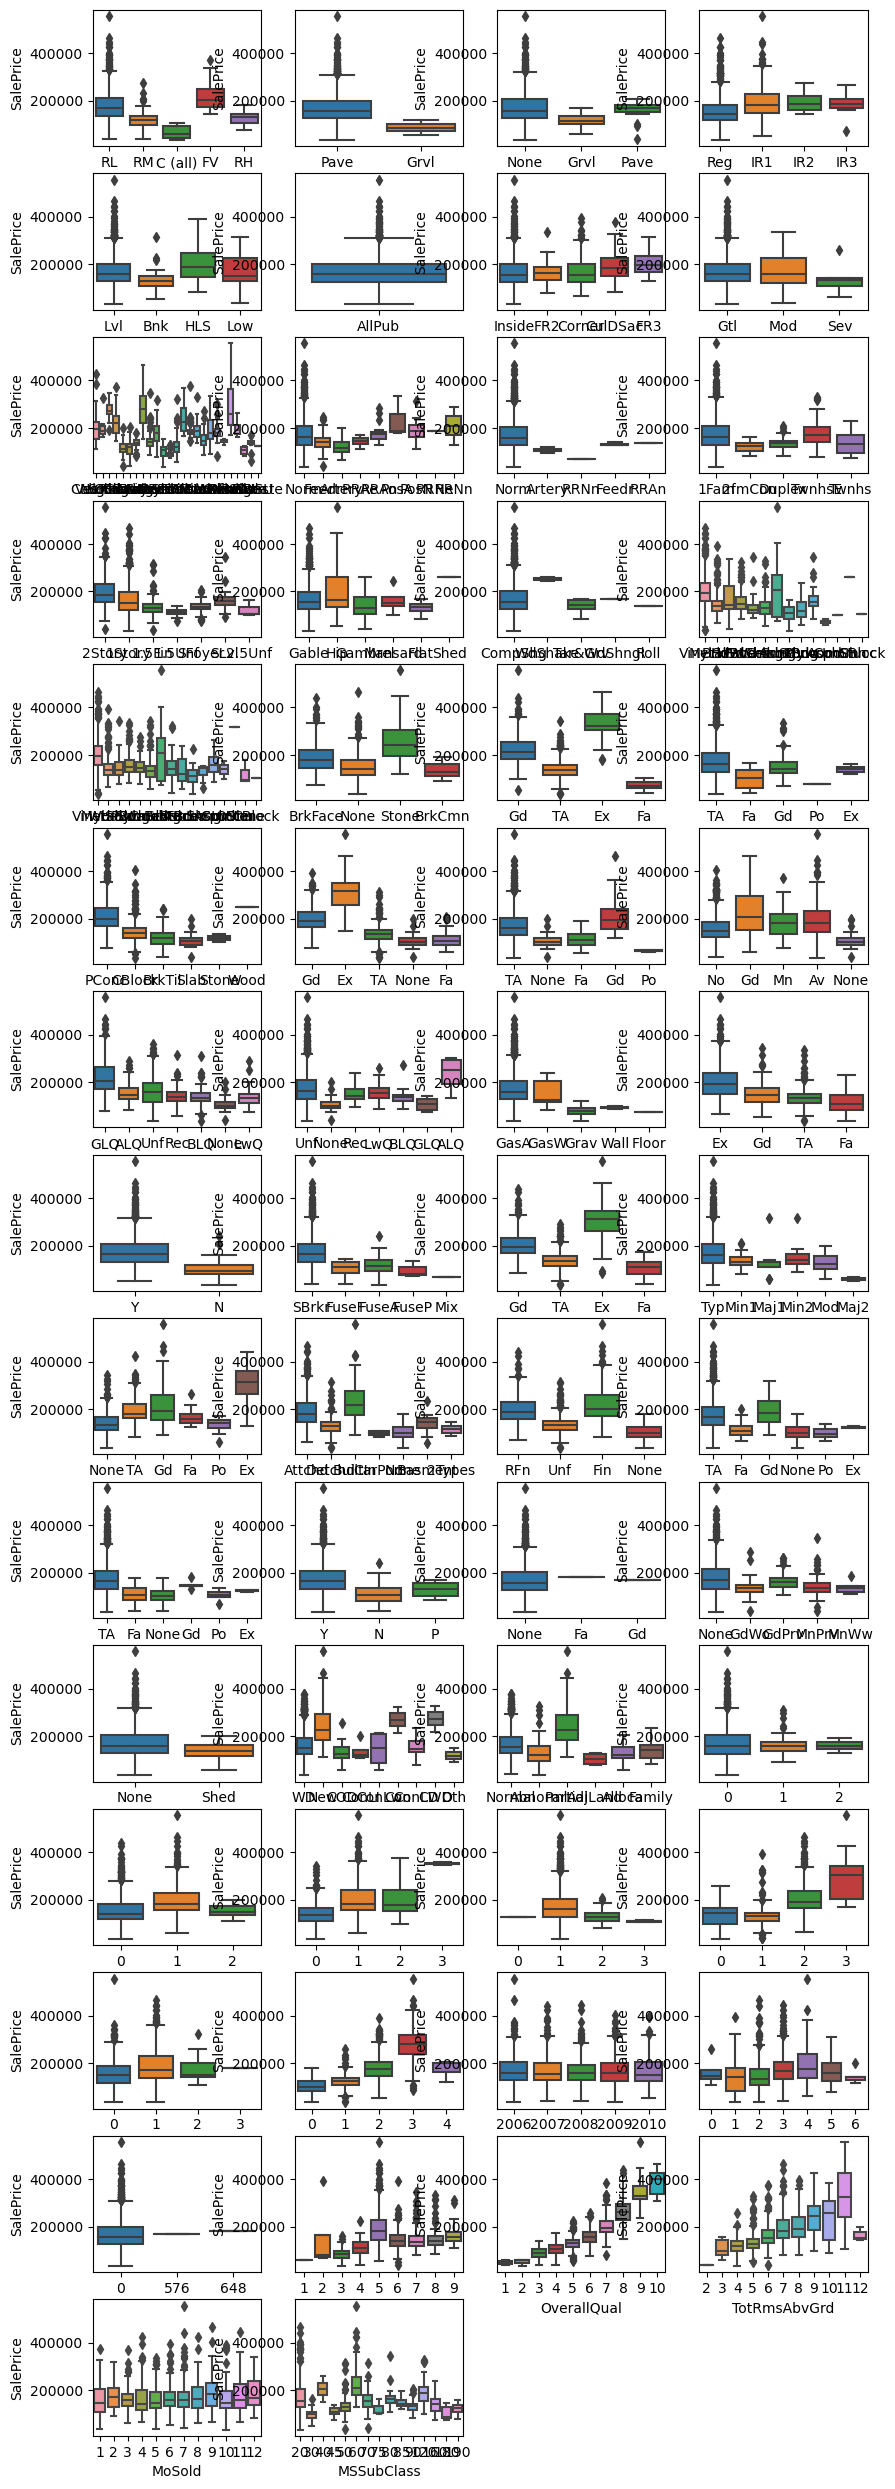

In [35]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(10,40))
x = 0
for i in cat:
    x = x + 1
    plt.subplot(19,4,x)
    sb.boxplot(trd[i],trd.SalePrice)

# Data preparation

In [36]:
trd[con].head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,1710,2003.0,548,0,61,0,0,0,0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,1262,1976.0,460,298,0,0,0,0,0
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,1786,2001.0,608,0,42,0,0,0,0
3,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,2198,2000.0,836,192,84,0,0,0,0
4,7,75.0,10084,2004,2005,186.0,1369,0,317,1686,...,0,1694,2004.0,636,255,57,0,0,0,0


In [37]:
trd[cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,BsmtFullBath,GarageCars,YrSold,BedroomAbvGr,PoolArea,OverallCond,OverallQual,TotRmsAbvGrd,MoSold,MSSubClass
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,1,2,2008,3,0,5,7,8,2,60
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,2,2007,3,0,8,6,6,5,20
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,1,2,2008,3,0,5,7,6,9,60
3,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,1,3,2008,4,0,5,8,9,12,60
4,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,1,2,2007,3,0,5,8,7,8,20


In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X1=pd.DataFrame(ss.fit_transform(trd[con]),columns=con)
X2=pd.get_dummies(trd[cat])
Xnew = X1.join(X2)

X11=pd.DataFrame(ss.fit_transform(tsd[con]),columns=con)
X21=pd.get_dummies(tsd[cat])
Xnew_test=X11.join(X21)

In [40]:
len(X2.columns),len(X21.columns)

(265, 263)

the varibles presents in Xnew should be in Xnew_test

In [41]:
Xnew_test[Xnew.columns]

KeyError: "['Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Heating_Floor', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa'] not in index"

In [42]:
Q =['Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Heating_Floor', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa']

# varibles in Q we have to add in Xnew_test with all values 0

In [43]:
for i in Q:
    Xnew_test[i]=0

# splitting

In [45]:
Y= trd[["SalePrice"]]
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Regression models

In [57]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
tr_err,ts_err

(214420231.05, 4.958683333777376e+22)

# Backward Elemination OLS models

ols model creates coefficient value to each variable but it does not create b0 value so thats why we need to create dummi column for b0 .it has 1,1..value which is called add constant.

In [59]:
from statsmodels.api import add_constant,OLS
xconst= add_constant(xtrain)
ols=OLS(ytrain,xconst).fit()

In [61]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     56.96
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:12:52   Log-Likelihood:                -10273.
No. Observations:                 933   AIC:                         2.101e+04
Df Residuals:                     701   BIC:                         2.213e+04
Df Model:                         231                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Id                     -442.0871    629.933     -0.702      0.483   -1678.869     794.695
LotFrontage            -417.6570    980.866     -0.426      0.670   -2343.443    1508.129
LotArea                3205.2689   1042.684      3.074      0.002    1158.110    5252.427
YearBuilt              9596.4577   2512.967      3.819      0.000    4662.615    1.45e+04
YearRemodAdd           2156.1379   1172.039      1.840      0.066    -144.989    4457.265
MasVnrArea              244.9319   1085.813      0.226      0.822   -1886.903    2376.767
BsmtFinSF1             6578.6628   1047.387      6.281      0.000    4522.271    8635.055
BsmtFinSF2              -43.0470   1360.688     -0.032      0.975   -2714.559    2628.465
BsmtUnfSF               909.4570    880.373      1.033      0.302    -819.027    2637.941
TotalBsmtSF            8143.8687   1499.140      5.432      0.000    5200.526    1.11e+04
1stFlrSF               3533.1012   1578.879      2.238      0.026     433.203    6632.999
2ndFlrSF               1.336e+04   1701.304      7.852      0.000       1e+04    1.67e+04
LowQualFinSF           -175.6766    656.675     -0.268      0.789   -1464.962    1113.609
GrLivArea              1.527e+04   1327.695     11.499      0.000    1.27e+04    1.79e+04
GarageYrBlt           -1093.3742   1643.659     -0.665      0.506   -4320.458    2133.710
GarageArea             2480.8424   1787.379      1.388      0.166   -1028.415    5990.100
WoodDeckSF             2871.5279    710.812      4.040      0.000    1475.953    4267.103
OpenPorchSF            1859.1271    750.770      2.476      0.014     385.101    3333.153
EnclosedPorch          1737.8726    758.112      2.292      0.022     249.430    3226.315
3SsnPorch              -311.7114    550.823     -0.566      0.572   -1393.172     769.750
ScreenPorch            1166.7667    637.164      1.831      0.067     -84.211    2417.745
MiscVal                 827.5067   1439.015      0.575      0.565   -1997.788    3652.801
BsmtHalfBath          -4207.9655   3058.344     -1.376      0.169   -1.02e+04    1796.646
HalfBath               -425.4252   2191.190     -0.194      0.846   -4727.507    3876.657
Fireplaces             3713.3353   2720.019      1.365      0.173   -1627.025    9053.696
KitchenAbvGr          -9010.5493   6558.978     -1.374      0.170   -2.19e+04    3867.045
FullBath               -845.7113   2328.621     -0.363      0.717   -5417.619    3726.197
BsmtFullBath           2014.6937   1962.689      1.026      0.305   -1838.759    5868.147
GarageCars             5829.9625   2412.155      2.417      0.016    1094.049    1.06e+04
YrSold                 -269.3253    514.282     -0.524      0.601   -1279.043     740.392
BedroomAbvGr          -2099.9964   1423.872     -1.475      0.141   -4895.562     695.569
PoolArea               

In [62]:
col_to_drop = ols.pvalues.sort_values().index[-1]

In [63]:
RS = []
for i in range(0,169,1):
    Xnew = Xnew.drop(labels=col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    from statsmodels.api import add_constant,OLS
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst).fit()
    rsq = round(ols.rsquared_adj,4)
    RS.append(rsq)
    col_to_drop = ols.pvalues.sort_values().index[-1]
    if(col_to_drop=="const"):
        col_to_drop = ols.pvalues.sort_values().index[-2]
    else:
        col_to_drop = ols.pvalues.sort_values().index[-1]


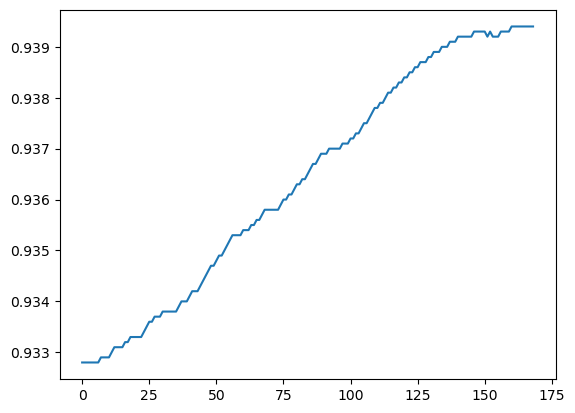

In [64]:
import matplotlib.pyplot as plt
plt.plot(RS)

In [65]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)
tr_err,ts_err

(226128723.18, 521072192.29)

In [66]:
def modeller(mo):
    model = mo.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    return tr_err,ts_err

In [67]:
modeller(lm)

(226128723.18, 521072192.29)

# Regularize¶

regularization is technique to prevent the model from overfitting by adding extra information to it.
it works by adding a penalty or complexity term to te complex model.

it reduces complexity of model

Ridge regression also called as L2 regularization and Lasso regression also called as L1 regulaization

In [68]:
from sklearn.linear_model import Ridge,Lasso

In [69]:
rr = Ridge(alpha=1)
modeller(rr)

(235804347.45, 488489982.89)

In [70]:
q = 0.0
alphas = []
for i in range(0,500):
    q = round(q + 0.1,2)
    alphas.append(q)

In [71]:
tr = []
ts = []
for i in alphas:
    rr = Ridge(alpha=i)
    tr_err,ts_err = modeller(rr)
    tr.append(tr_err)
    ts.append(ts_err)

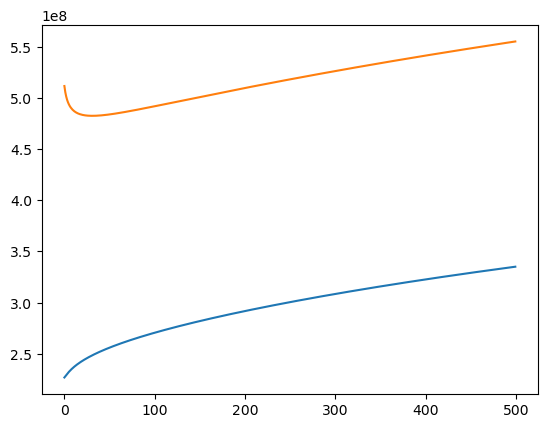

In [72]:
plt.plot(tr)
plt.plot(ts)

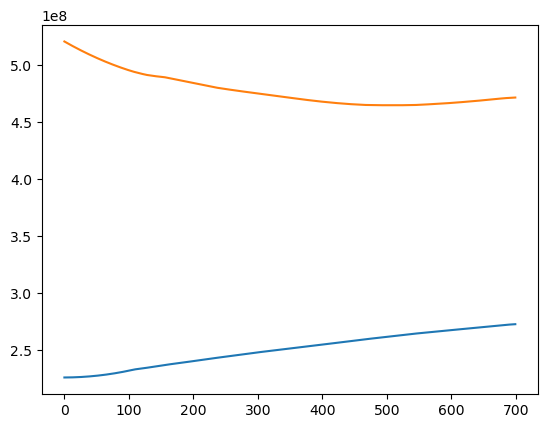

In [73]:
q = 0.0
alphas = []
for i in range(0,700):
    q = round(q + 0.1,2)
    alphas.append(q)

tr = []
ts = []
for i in alphas:
    ls = Lasso(alpha=i)
    tr_err,ts_err = modeller(ls)
    tr.append(tr_err)
    ts.append(ts_err)
plt.plot(tr)
plt.plot(ts)

In [74]:
521072192.29 - 226128723.18

294943469.11

In [75]:
alphas[500]

50.1

In [76]:
ls = Lasso(alpha=50.1)
modeller(ls)

(261836353.1, 464790723.03)

In [77]:
464790723.03 - 261836353.1

202954369.92999998

In [78]:
294943469 - 202954369

91989100

In [79]:
from sklearn.model_selection import GridSearchCV
ls = Lasso()
tg = {"alpha":alphas}

cv = GridSearchCV(ls,tg,scoring="neg_mean_squared_error",cv=5)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 70.0}

# Final Model


In [80]:
ls = Lasso(alpha=10.0)
model = ls.fit(Xnew,Y)

# Data preparation for predictions¶

In [81]:
final_df_pred = Xnew_test[Xnew.columns]

In [82]:
pred = model.predict(final_df_pred)

In [83]:
Q = tsd[["Id"]]
Q['SalePrice']=pred

In [84]:
Q.to_csv("Desktop/submissions.csv")